In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv("train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data= np.array(data)
m,n=data.shape
np.random.shuffle(data)

data_dev=data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]

data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]
X_train = X_train / 255.0
X_dev = X_dev / 255.0


In [4]:
def init_params():
    W1 = np.random.randn(10, 784) * np.sqrt(1. / 784)
    b1 = np.zeros((10, 1))
    W2 = np.random.randn(10, 10) * np.sqrt(1. / 10)
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    Z_max = np.max(Z, axis=0, keepdims=True)
    exp_Z = np.exp(Z - Z_max)
    A = exp_Z / np.sum(exp_Z, axis=0, keepdims=True)
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / X.shape[1] * dZ2.dot(A1.T)
    db2 = 1 / X.shape[1] * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / X.shape[1] * dZ1.dot(X.T)
    db1 = 1 / X.shape[1] * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return float(np.sum(predictions == Y)*100 / Y.size)

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration: {i}, Accuracy: {accuracy}")
    return W1, b1, W2, b2


In [6]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.08, 1000)

Iteration: 0, Accuracy: 9.626829268292683
Iteration: 10, Accuracy: 34.69512195121951
Iteration: 20, Accuracy: 49.16829268292683
Iteration: 30, Accuracy: 59.3780487804878
Iteration: 40, Accuracy: 66.12439024390244
Iteration: 50, Accuracy: 71.96829268292683
Iteration: 60, Accuracy: 75.6951219512195
Iteration: 70, Accuracy: 78.08536585365853
Iteration: 80, Accuracy: 79.80243902439024
Iteration: 90, Accuracy: 81.1219512195122
Iteration: 100, Accuracy: 82.01463414634146
Iteration: 110, Accuracy: 82.79268292682927
Iteration: 120, Accuracy: 83.41951219512195
Iteration: 130, Accuracy: 84.0780487804878
Iteration: 140, Accuracy: 84.54146341463415
Iteration: 150, Accuracy: 84.98048780487805
Iteration: 160, Accuracy: 85.35853658536585
Iteration: 170, Accuracy: 85.6609756097561
Iteration: 180, Accuracy: 85.98048780487805
Iteration: 190, Accuracy: 86.30243902439024
Iteration: 200, Accuracy: 86.58292682926829
Iteration: 210, Accuracy: 86.8390243902439
Iteration: 220, Accuracy: 87.05609756097562
Itera

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


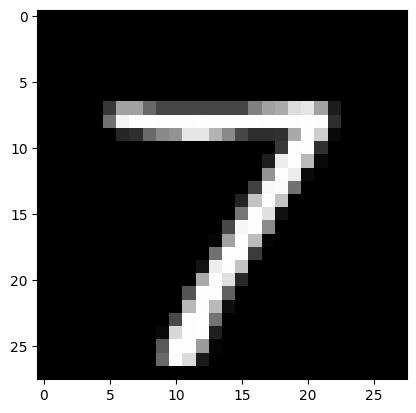

Prediction:  [3]
Label:  3


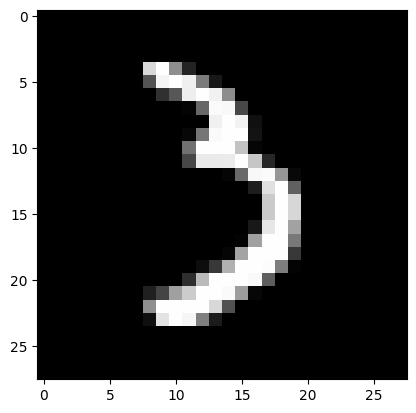

Prediction:  [5]
Label:  5


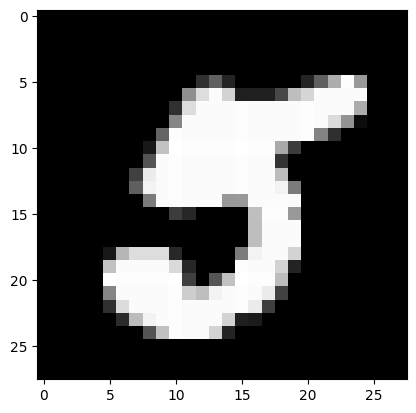

Prediction:  [9]
Label:  9


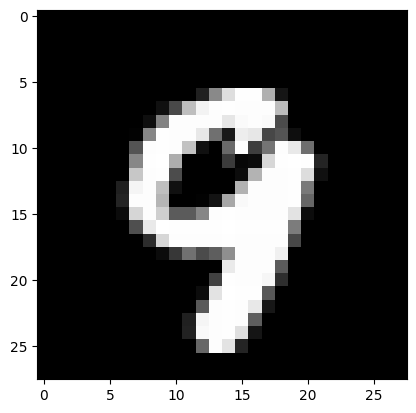

In [8]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [9]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

90.8

In [10]:
test_d=pd.read_csv("test.csv")
test_d=np.array(test_d)
X_test=test_d[1:n]
X_test = X_test / 255.0
test_acc= make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

90.8